<a href="https://colab.research.google.com/github/Sriram4207/SCT_AD_1/blob/main/Data_cleaning_and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preview of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

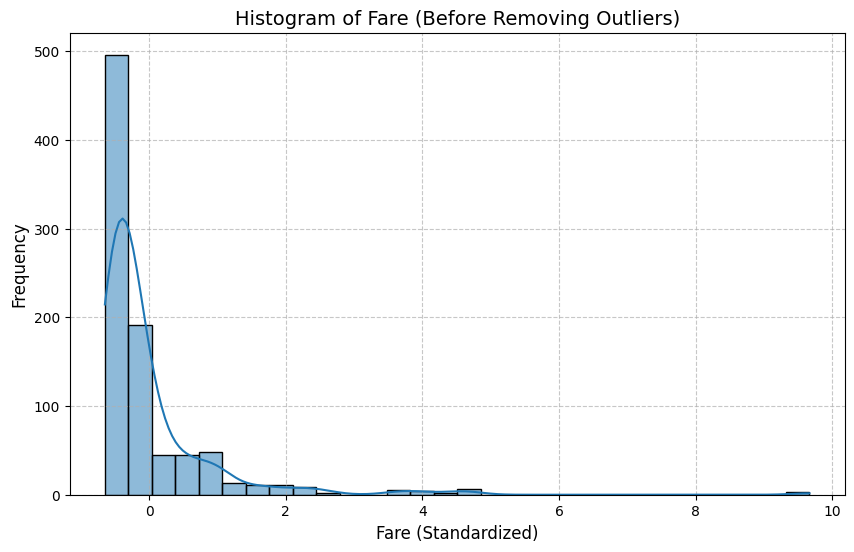


Removed 116 outliers from 'Fare' column.


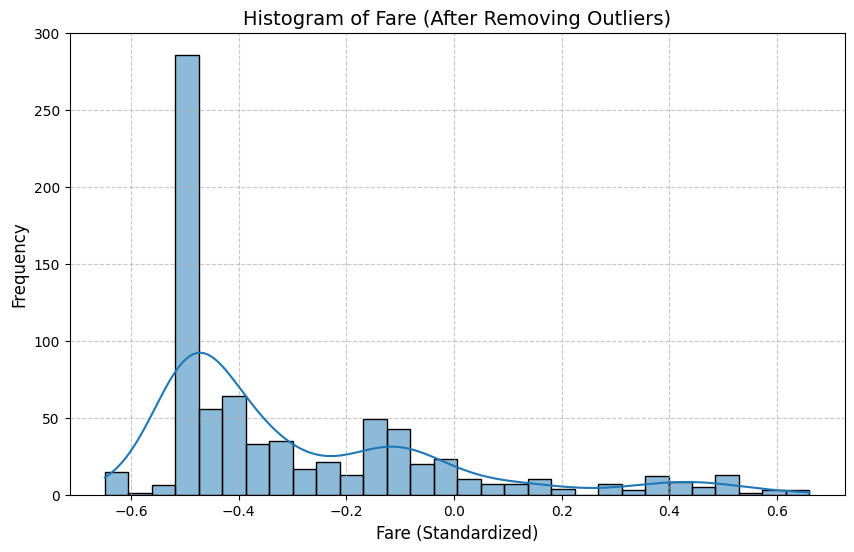

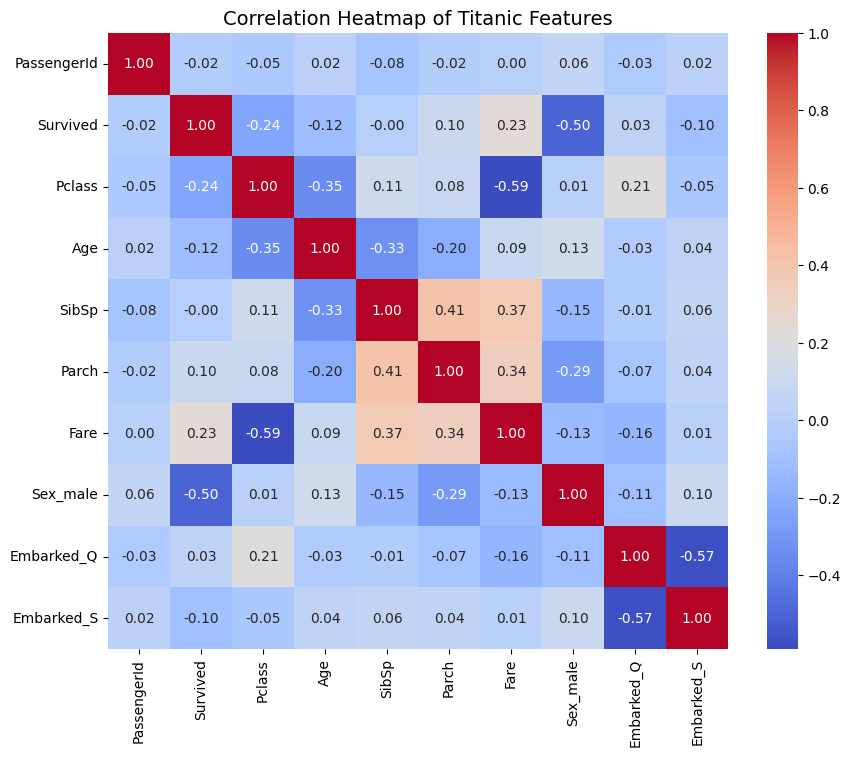


✅ Data Cleaning Completed Successfully!
Cleaned dataset saved as 'cleaned_titanic.csv'


In [9]:
# ===========================================================
# AI & ML Internship - Task 1: Data Cleaning & Preprocessing
# Author: <Your Name>
# ===========================================================

# --- Import Required Libraries ---
import pandas as pd                # For data handling and analysis
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt    # For data visualization
import seaborn as sns              # For advanced visualizations

# --- Step 1: Import Dataset ---
# Load the Titanic dataset directly from the given URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first 5 rows to understand the data structure
print("Preview of the dataset:")
print(df.head())

# --- Step 2: Explore the Data ---
print("\n--- Dataset Information ---")
print(df.info())      # Shows column names, data types, and missing values

print("\n--- Summary Statistics ---")
print(df.describe())  # Displays mean, median, standard deviation, etc.

print("\n--- Missing Values per Column ---")
print(df.isnull().sum())  # Shows how many null values each column has

# --- Step 3: Handle Missing Values ---
# Fill missing 'Age' values with the median (to avoid bias from outliers)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' values with the mode (most common port)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# The 'Cabin' column has too many missing values; instead of dropping all rows,
# we'll fill missing values with 'Unknown' (keeps more data)
df['Cabin'] = df['Cabin'].fillna('Unknown')

# --- Step 4: Encode Categorical Variables ---
# Convert text columns ('Sex', 'Embarked') into numeric dummy variables
# drop_first=True removes one category to avoid redundancy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

print("\n--- Columns after Encoding ---")
print(df.columns)

# --- Step 5: Normalize Numerical Columns ---
# Standardize 'Age' and 'Fare' so all values have mean=0 and standard deviation=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# --- Step 6: Detect and Visualize Outliers (Histogram) ---
plt.figure(figsize=(10, 6))                      # Larger figure for clarity
sns.histplot(x='Fare', data=df, bins=30, kde=True) # Changed to histplot with KDE
plt.title("Histogram of Fare (Before Removing Outliers)", fontsize=14)
plt.xlabel("Fare (Standardized)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)        # Add light grid for better readability
plt.show()

# --- Step 7: Remove Outliers using IQR Method ---
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1                                   # Interquartile range

# Keep only values within 1.5 * IQR range
before = len(df)
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]
after = len(df)

print(f"\nRemoved {before - after} outliers from 'Fare' column.")

# --- Step 8: Visualize Data After Cleaning (Histogram) ---
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare', data=df, bins=30, kde=True) # Changed to histplot with KDE
plt.title("Histogram of Fare (After Removing Outliers)", fontsize=14)
plt.xlabel("Fare (Standardized)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# --- Step 9: Correlation Heatmap (Extra Visualization) ---
plt.figure(figsize=(10, 8))
# Drop non-numeric columns that are not relevant for correlation calculation
df_numeric = df.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Titanic Features", fontsize=14)
plt.show()

# --- Step 10: Save the Cleaned Data ---
# Save the final cleaned dataset to a CSV file
df.to_csv("cleaned_titanic.csv", index=False)

print("\n✅ Data Cleaning Completed Successfully!")
print("Cleaned dataset saved as 'cleaned_titanic.csv'")
